# implementing the perceptron

In [99]:
import numpy as np

In [100]:
class Perceptron:
    """
    Paramaters
    -----------
    epochs : int
        number of iterations
    eta : int
        learning rate
    randome state : int
        seed for random number generator

    Attributes
    -----------
    weights_ : array
    bias_ : int
    errors_ : list
        number of misclassification in each epoch
    """
    def __init__(self, eta=0.01, epochs=50, random_state=1):
        self.eta = eta
        self.epochs = epochs
        self.random_state = random_state
    
    def fit(self,X,y):
        rgen = np.random.RandomState(self.random_state)
        self.weights_ = rgen.normal(loc=0.0,size=X.shape[1],scale=0.01)
        self.bias_ = np.float_(0.)
        self.errors_ = []
        for _ in range(self.epochs):
            errors = 0
            for xi, targets in zip(X,y):
                update = self.eta * (targets - self.predict(xi))
                self.weights_ += update * xi
                self.bias_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            #print(self.weights_)
        return self

    def net_input(self,X):
        "return z in for sigma(z)= wx + b"
        return np.dot(X, self.weights_) + self.bias_
        
    def predict(self,X):
        return np.where(self.net_input(X) >= 0.0, 1,0)

# testing the perceptron

In [101]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])
p = Perceptron(eta=0.01,epochs=100)
p.fit(X,y)

print("Weights: ",p.weights_)
print("Bias: ",p.bias_)

Weights:  [-0.00375655 -0.00611756]
Bias:  0.0


# using the perceptron with the iris data

In [102]:
import pandas as pd

In [103]:
iris_data_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(iris_data_link, header=None, encoding="utf-8")

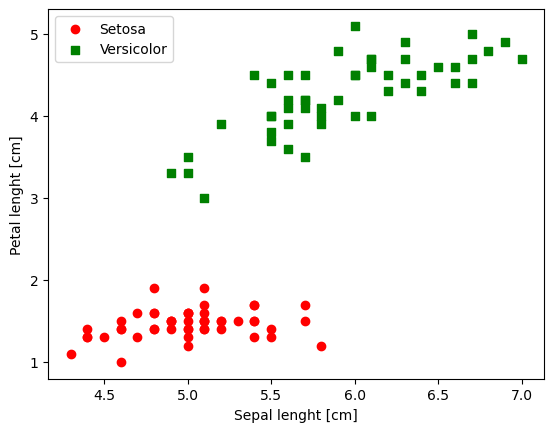

In [108]:
#ploting data

import matplotlib.pyplot as plt

y = df.iloc[0:100,4].values
y = np.where(y == 'Iris-setosa', 0, 1)

X = df.iloc[0:100,[0,2]].values

plt.scatter(X[:50,0],X[:50,1],color="red",marker="o",label="Setosa")
plt.scatter(X[50:100,0],X[50:100,1],color="green",marker="s",label='Versicolor')
plt.xlabel("Sepal lenght [cm]")
plt.ylabel("Petal lenght [cm]")
plt.legend(loc="upper left")
plt.show()